# Aula 13 - template de projeto de ML com titanic

In [1]:
# recarregar automaticamente as alterações que fizermos no .py
%load_ext autoreload
%autoreload 2

In [2]:
from titanic_utils import *

Base utilizada: titanic3, versão melhorada da base.

Para mais informações, [veja aqui](https://www.openml.org/d/40945) ou então [aqui](https://rdrr.io/cran/PASWR/man/titanic3.html).

____
____
____

### Analise a estrututura da base e representação dos NaNs

In [3]:
df = pd.read_csv("../datasets/titanic.csv", na_values="?")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [5]:
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


__________

## EDA entraria aqui.

In [6]:
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


In [7]:
df["name"].nunique()

1307

In [8]:
df["home.dest"].nunique()

369

__________

# Agora, começa o ciclo de modelagem

_________

## Começamos com um baseline

- Jogar fora NaNs e dados nulos, e treinar alguns classificadores simples

In [9]:
df_model_baseline = df.select_dtypes(include=np.number).dropna(axis=1)

X = df_model_baseline.drop(columns="survived")
y = df_model_baseline["survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)

dados_split = (X_train, X_test, y_train, y_test)


Métricas de avaliação de treino:
[[445  97]
 [185 150]]


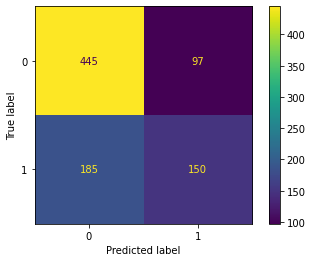

              precision    recall  f1-score   support

           0       0.71      0.82      0.76       542
           1       0.61      0.45      0.52       335

    accuracy                           0.68       877
   macro avg       0.66      0.63      0.64       877
weighted avg       0.67      0.68      0.67       877


Métricas de avaliação de teste:
[[226  41]
 [ 90  75]]


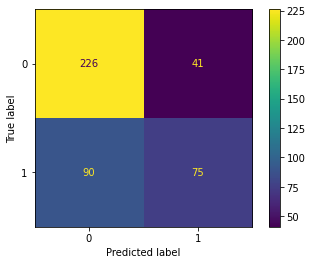

              precision    recall  f1-score   support

           0       0.72      0.85      0.78       267
           1       0.65      0.45      0.53       165

    accuracy                           0.70       432
   macro avg       0.68      0.65      0.65       432
weighted avg       0.69      0.70      0.68       432



In [10]:
lr_baseline = LogisticRegression().fit(X_train, y_train)

metricas_classificacao(lr_baseline, *dados_split)

__________

## Pipelines avançadas, e vários modelos, busca de hiperparâmetros


- primeiro, começamos só com as pipelines, pra identificar estimadores promissores, e ver se as pipelines generalizadas tão dando bons resultados, com hiperparâmetros default

In [11]:
drop = ['survived', 'name', 'ticket', 'cabin', 'boat', 'body', 'home.dest']

X_train, X_test, y_train, y_test, pre_processador = pipe_pre_process_titanic(drop_not_features=drop,
                                                                             col_target="survived",
                                                                             inputer_num_strategy="mean",
                                                                             encoding="onehot")




                    Pipe: SVC                     




Métricas de avaliação de treino:
[[564  83]
 [112 288]]


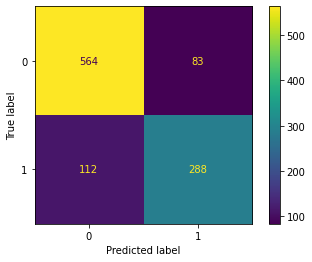

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       647
           1       0.78      0.72      0.75       400

    accuracy                           0.81      1047
   macro avg       0.81      0.80      0.80      1047
weighted avg       0.81      0.81      0.81      1047


Métricas de avaliação de teste:
[[146  16]
 [ 26  74]]


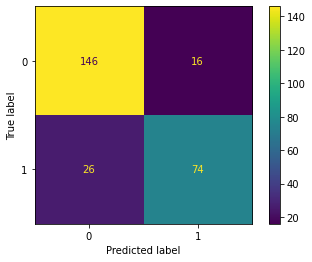

              precision    recall  f1-score   support

           0       0.85      0.90      0.87       162
           1       0.82      0.74      0.78       100

    accuracy                           0.84       262
   macro avg       0.84      0.82      0.83       262
weighted avg       0.84      0.84      0.84       262




             Pipe: Gradient boosting              




Métricas de avaliação de treino:
[[607  40]
 [105 295]]


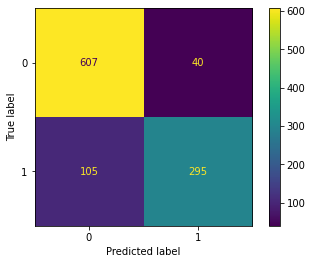

              precision    recall  f1-score   support

           0       0.85      0.94      0.89       647
           1       0.88      0.74      0.80       400

    accuracy                           0.86      1047
   macro avg       0.87      0.84      0.85      1047
weighted avg       0.86      0.86      0.86      1047


Métricas de avaliação de teste:
[[144  18]
 [ 31  69]]


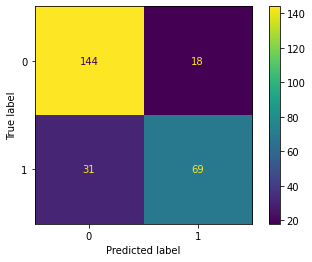

              precision    recall  f1-score   support

           0       0.82      0.89      0.85       162
           1       0.79      0.69      0.74       100

    accuracy                           0.81       262
   macro avg       0.81      0.79      0.80       262
weighted avg       0.81      0.81      0.81       262




               Pipe: Random forest                




Métricas de avaliação de treino:
[[631  16]
 [ 16 384]]


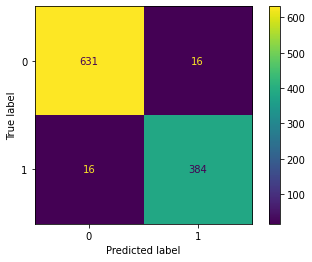

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       647
           1       0.96      0.96      0.96       400

    accuracy                           0.97      1047
   macro avg       0.97      0.97      0.97      1047
weighted avg       0.97      0.97      0.97      1047


Métricas de avaliação de teste:
[[133  29]
 [ 28  72]]


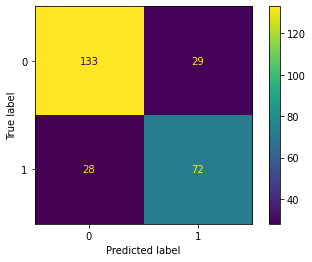

              precision    recall  f1-score   support

           0       0.83      0.82      0.82       162
           1       0.71      0.72      0.72       100

    accuracy                           0.78       262
   macro avg       0.77      0.77      0.77       262
weighted avg       0.78      0.78      0.78       262



In [12]:
pipe_svc = Pipeline([("pre_processador", pre_processador),
                     ("svc", SVC(random_state=42))])

pipe_gb = Pipeline([("pre_processador", pre_processador),
                     ("gb", GradientBoostingClassifier(random_state=42))])

pipe_rf = Pipeline([("pre_processador", pre_processador),
                     ("rf", RandomForestClassifier(random_state=42))])

# ==================

pipes_dict = {"SVC": pipe_svc, "Gradient boosting": pipe_gb, "Random forest": pipe_rf}


for label, pipe in pipes_dict.items():
    
    print("\n\n")
    print("="*50)
    print(f"Pipe: {label}".center(50))
    print("="*50)
    print("\n\n")
    
    pipe.fit(X_train, y_train)

    ########################################

    dados_split = (X_train, X_test, y_train, y_test)

    metricas_classificacao(pipe, *dados_split)
    

- Agora sim, buscamos hiperparâmetros, com gridsearch, etc.




                    Pipe: SVC                     
Params grid:

('svc__C', array([1.e-04, 1.e-02, 1.e+00, 1.e+02, 1.e+04]))
('svc__gamma', array([1.e-04, 1.e-02, 1.e+00, 1.e+02, 1.e+04]))



Fitting 5 folds for each of 25 candidates, totalling 125 fits

Best params:
{'svc__C': 100.0, 'svc__gamma': 0.01}

Métricas de avaliação de treino:
[[565  82]
 [115 285]]


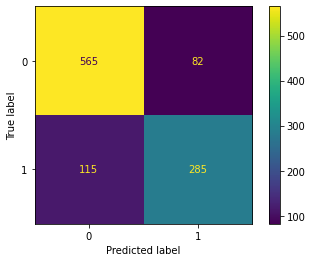

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       647
           1       0.78      0.71      0.74       400

    accuracy                           0.81      1047
   macro avg       0.80      0.79      0.80      1047
weighted avg       0.81      0.81      0.81      1047


Métricas de avaliação de teste:
[[147  15]
 [ 26  74]]


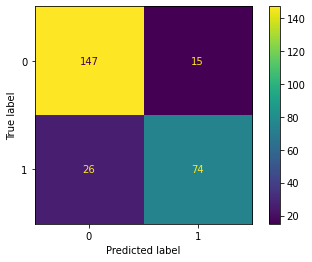

              precision    recall  f1-score   support

           0       0.85      0.91      0.88       162
           1       0.83      0.74      0.78       100

    accuracy                           0.84       262
   macro avg       0.84      0.82      0.83       262
weighted avg       0.84      0.84      0.84       262




             Pipe: Gradient boosting              
Params grid:

('gb__loss', ['deviance', 'exponential'])
('gb__n_estimators', array([ 500,  600,  700,  800,  900, 1000]))
('gb__max_depth', range(1, 5))



Fitting 5 folds for each of 48 candidates, totalling 240 fits

Best params:
{'gb__loss': 'exponential', 'gb__max_depth': 2, 'gb__n_estimators': 600}

Métricas de avaliação de treino:
[[600  47]
 [ 90 310]]


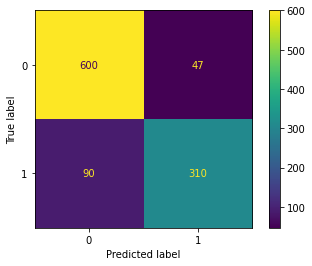

              precision    recall  f1-score   support

           0       0.87      0.93      0.90       647
           1       0.87      0.78      0.82       400

    accuracy                           0.87      1047
   macro avg       0.87      0.85      0.86      1047
weighted avg       0.87      0.87      0.87      1047


Métricas de avaliação de teste:
[[145  17]
 [ 31  69]]


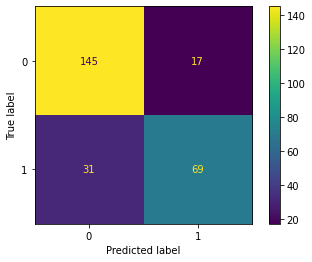

              precision    recall  f1-score   support

           0       0.82      0.90      0.86       162
           1       0.80      0.69      0.74       100

    accuracy                           0.82       262
   macro avg       0.81      0.79      0.80       262
weighted avg       0.82      0.82      0.81       262




               Pipe: Random forest                
Params grid:

('rf__criterion', ['gini', 'entropy'])
('rf__n_estimators', array([ 500,  600,  700,  800,  900, 1000]))
('rf__max_depth', range(1, 5))



Fitting 5 folds for each of 48 candidates, totalling 240 fits

Best params:
{'rf__criterion': 'entropy', 'rf__max_depth': 4, 'rf__n_estimators': 900}

Métricas de avaliação de treino:
[[567  80]
 [120 280]]


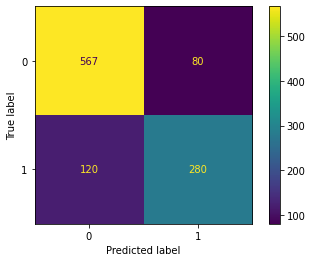

              precision    recall  f1-score   support

           0       0.83      0.88      0.85       647
           1       0.78      0.70      0.74       400

    accuracy                           0.81      1047
   macro avg       0.80      0.79      0.79      1047
weighted avg       0.81      0.81      0.81      1047


Métricas de avaliação de teste:
[[147  15]
 [ 27  73]]


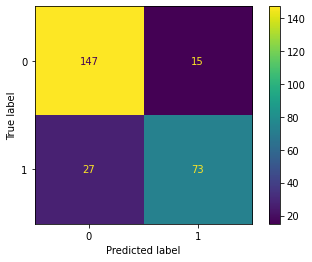

              precision    recall  f1-score   support

           0       0.84      0.91      0.88       162
           1       0.83      0.73      0.78       100

    accuracy                           0.84       262
   macro avg       0.84      0.82      0.83       262
weighted avg       0.84      0.84      0.84       262



In [13]:
param_grid_svc = {"svc__C" : np.logspace(-4, 4, 5),
                  "svc__gamma" : np.logspace(-4, 4, 5)}

param_grid_gb = {"gb__loss" : ["deviance", "exponential"],
                 "gb__n_estimators" : np.arange(5, 11)*100,
                 "gb__max_depth" : range(1, 5)}

param_grid_rf = {"rf__criterion" : ["gini", "entropy"],
                 "rf__n_estimators" : np.arange(5, 11)*100,
                 "rf__max_depth" : range(1, 5)}

# ==================

grids_dict = {"SVC": param_grid_svc, "Gradient boosting": param_grid_gb, "Random forest": param_grid_rf}

# ==================

splitter = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# ==================

for (label, pipe), (_, grid) in zip(pipes_dict.items(), grids_dict.items()):
    
    print("\n\n")
    print("="*50)
    print(f"Pipe: {label}".center(50))
    print("Params grid:\n")
    print(*grid.items(), sep="\n")
    print("="*50)
    print("\n\n")
    
    grid = GridSearchCV(estimator=pipe,
                        param_grid=grid,
                        scoring="f1_weighted",
                        cv=splitter,
                        verbose=10,
                        n_jobs=-1)

    grid.fit(X_train, y_train)
    
    print(f"\nBest params:\n{grid.best_params_}")
    
    ########################################

    dados_split = (X_train, X_test, y_train, y_test)

    metricas_classificacao(grid, *dados_split)